In [330]:
from pyspark.sql import SparkSession
import boto3
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter
from itertools import islice
from datetime import datetime

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [110]:
spark=SparkSession.builder.appName('data_processing').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
df=spark.read.csv('s3://proyecto-big-data-jsj/datos/02-12.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [112]:
df_new=df.drop('Fecha de notificación','ID de caso', 'Tipo de contagio','fecha reporte web', 'Código DIVIPOLA departamento', 'Código DIVIPOLA municipio', 'Código ISO del país', 'Pertenencia étnica', 'Nombre del grupo étnico' ,'Ubicación del caso', 'Estado', 'Unidad de medida de edad', 'Fecha de diagnóstico', 'Tipo de recuperación','Fecha de recuperación','Fecha de inicio de síntomas','Fecha de muerte')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [113]:
fallecido_dpto=df_new.filter(df_new['Recuperado']=='Fallecido').groupBy('Nombre departamento').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [114]:
fallecido_edad=df_new.filter(df_new['Recuperado']=='Fallecido').groupBy('Edad').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [223]:
fallecido_sexo_dpto=df_new.filter(df_new['Recuperado']=='Fallecido').groupBy('Sexo','Nombre departamento').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [116]:
fallecido_pais=df_new.filter(df_new['Recuperado']=='Fallecido').groupBy('Nombre del país').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [117]:
array_fd1=np.array(fallecido_dpto.select('Nombre departamento','count').collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [206]:
tmp = []
for x in array_fd1:
    tmp.append([x[0],int(x[1])])

Dpt = sorted(tmp, key=lambda x: x[1] ,reverse=True)


plt.figure(figsize=(20,10))
plt.xlabel('Muertes')
plt.title('Departamentos con mas muertes')
for x in islice(Dpt, 0, 10):
    plt.barh(x[0],x[1])
plt.show()
    
    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

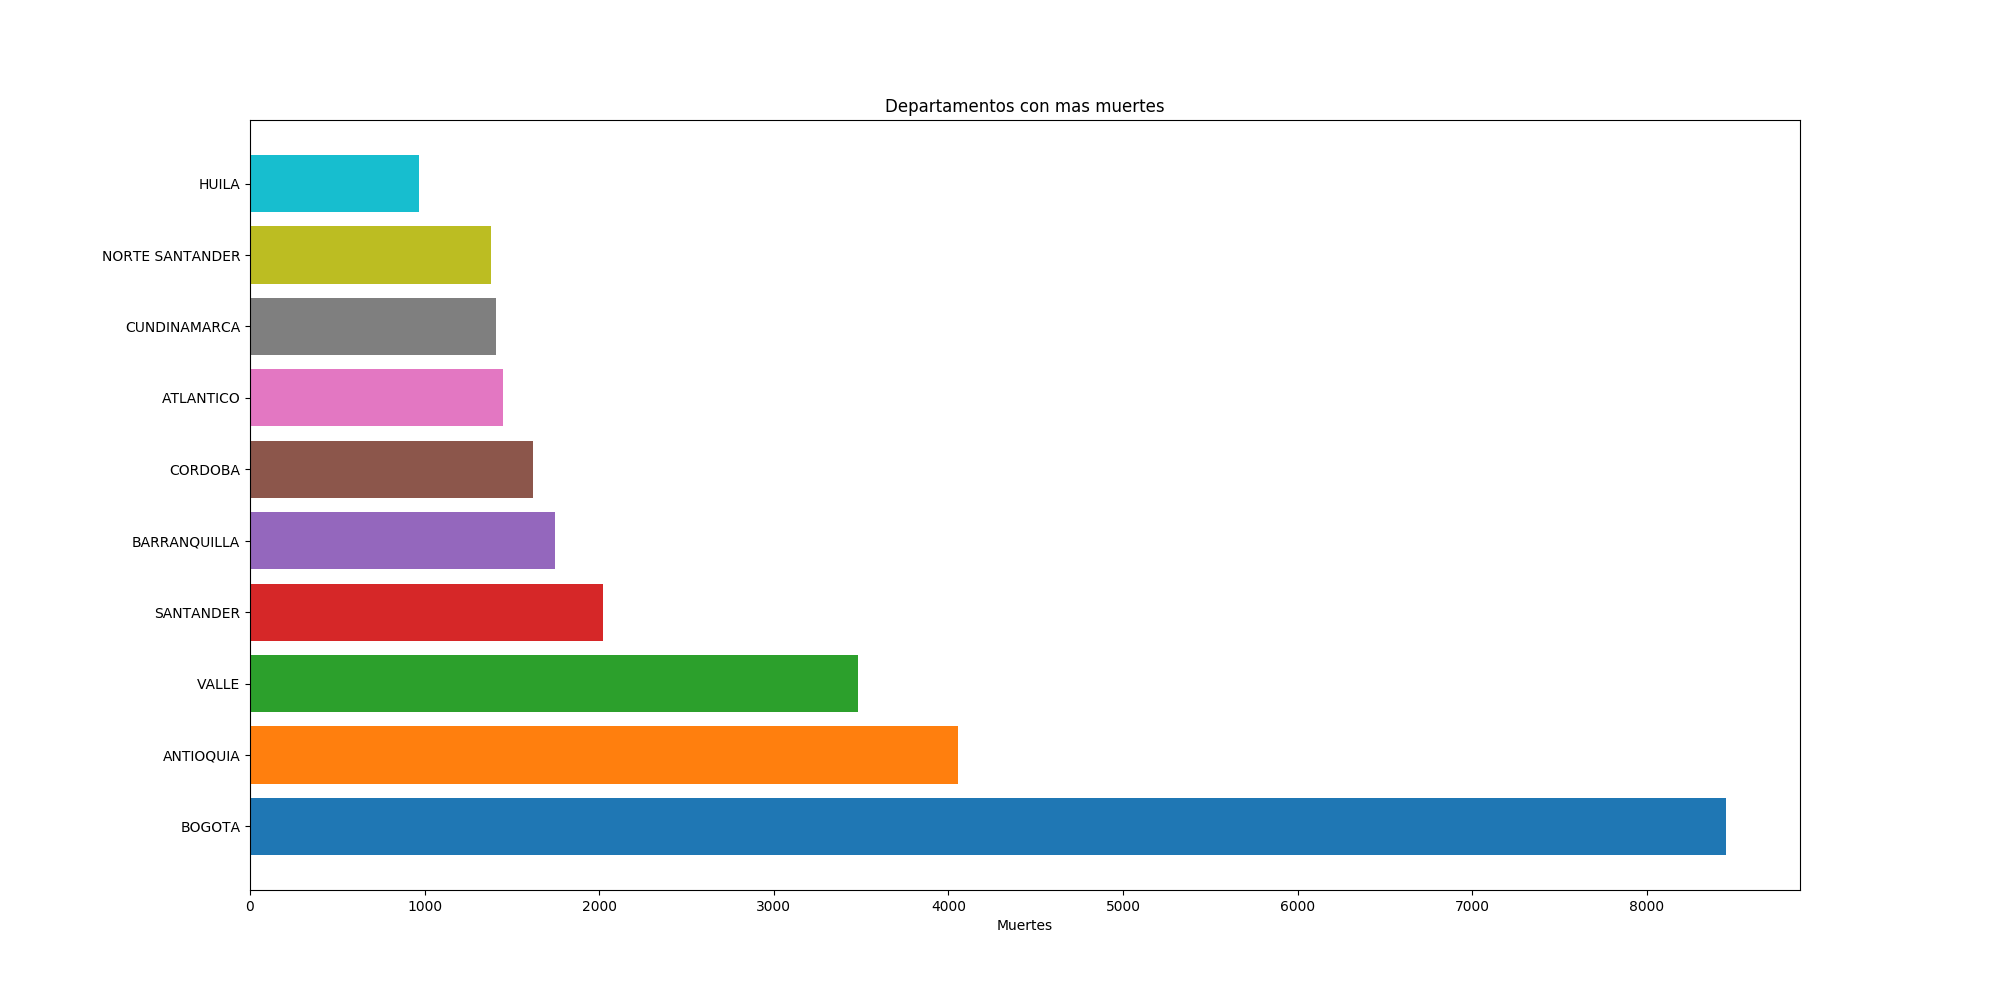

In [207]:
%matplot plt

In [148]:
array_fe=np.array(fallecido_edad.select('Edad','count').collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [226]:
tmp = []
for x in array_fe:
    tmp.append([str(x[0]),x[1]])


Edad = sorted(tmp, key=lambda x: x[1] ,reverse=True)

plt.figure(figsize=(20,10))
plt.ylabel('Muertes')
plt.xlabel('Edad')
plt.title('Poblacion Vulnerable')

for x in islice(Edad, 0, 20):
      plt.bar(x[0],x[1])
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

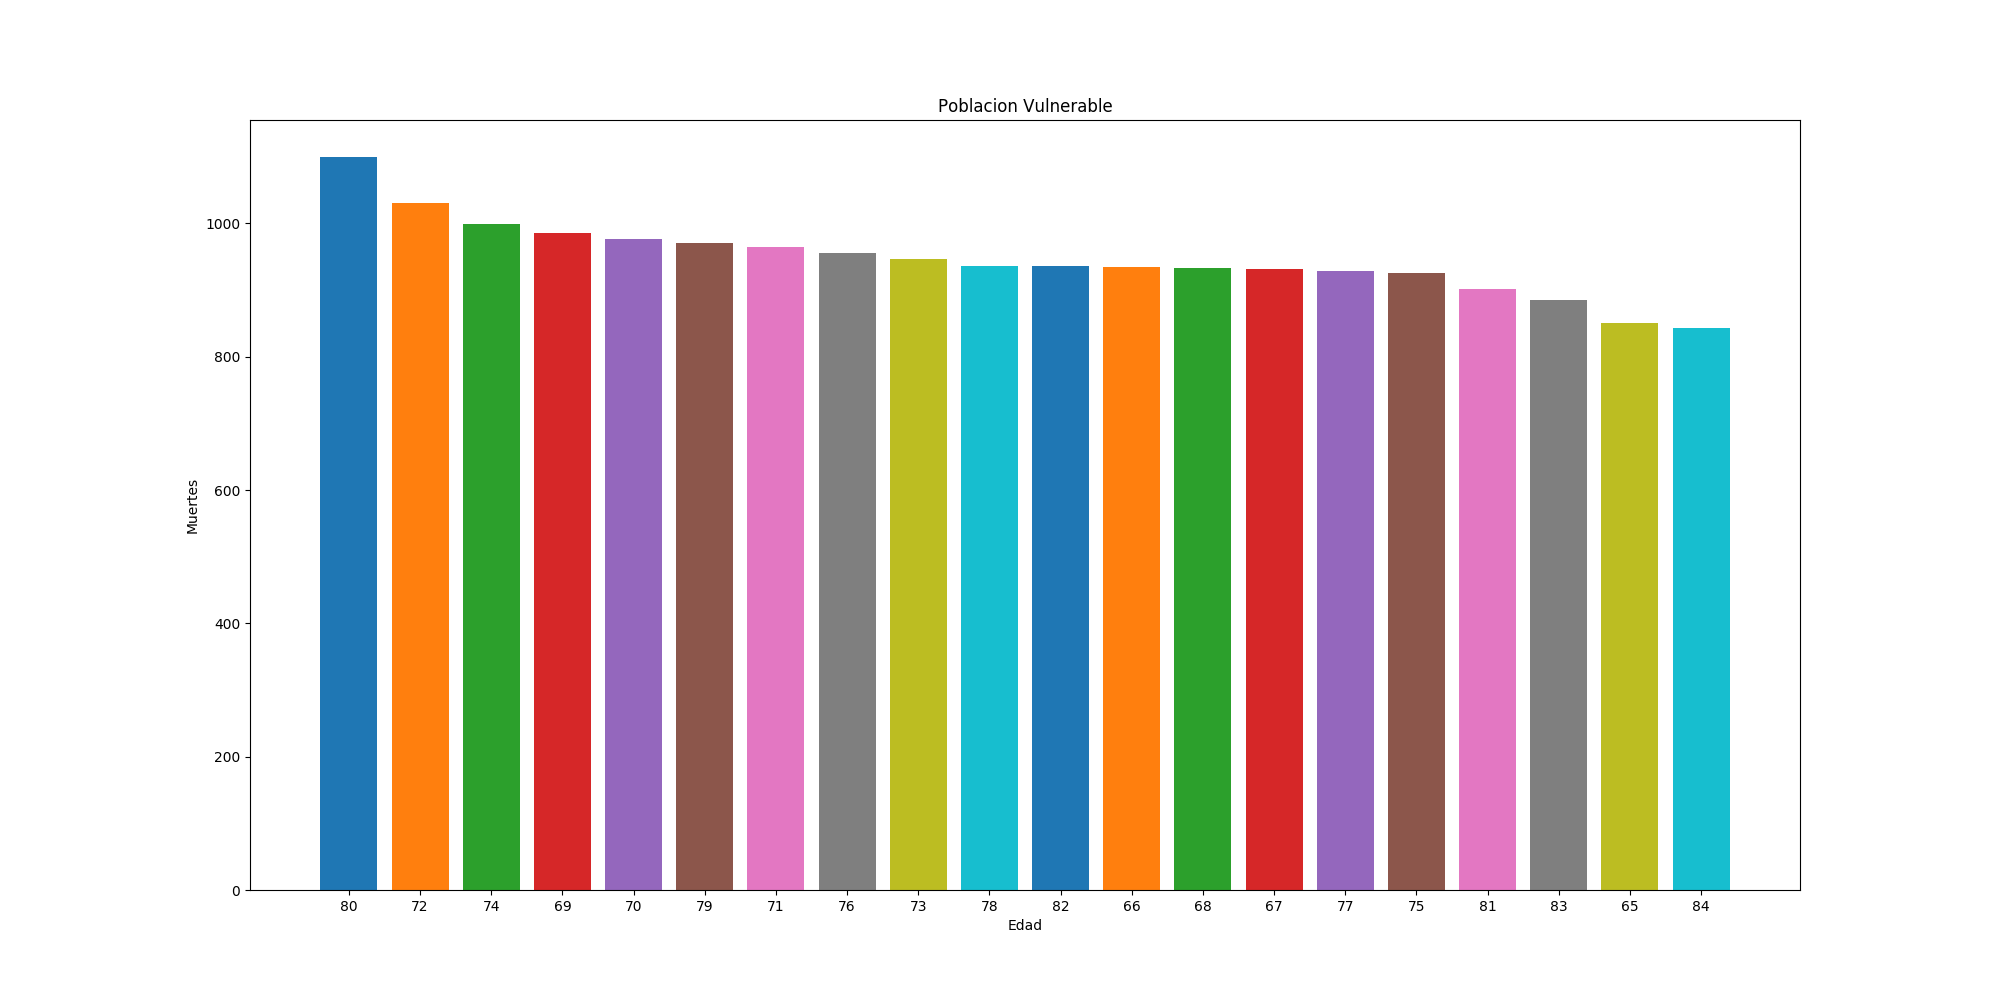

In [227]:
%matplot plt

In [224]:
array_fs=np.array(fallecido_sexo_dpto.select('Sexo','nombre departamento','count').collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [321]:
tmp = []
mujeres = []
hombres =[]
dpto =[]
for x in array_fs:
    tmp.append([x[0],x[1],int(x[2])])
    
Sexo = sorted(tmp, key=lambda x: x[2],reverse=True)
tmp.clear()

for x in Sexo:
    if x[1] =='ANTIOQUIA' or x[1] =='BOGOTA' or x[1] =='VALLE' or x[1] =='BARRANQUILLA':
        tmp.append(x)

Muertes = sorted(tmp, key=lambda x: x[1],reverse=True)

for x in Muertes:
    
    if x[0] == 'M' :
        hombres.append(x[2])
    else:
        mujeres.append(x[2])
        dpto.append(x[1])

x = np.arange(len(dpto))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10),dpi=150)
rects1 = ax.bar(x - width/2, hombres, width, label='Hombres')
rects2 = ax.bar(x + width/2, mujeres, width, label='Mujeres')

ax.set_ylabel('Muertes')
ax.set_title('Muertes por genero en departamentos importantes')
ax.set_xticks(x)
ax.set_xticklabels(dpto)
ax.legend()

plt.show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

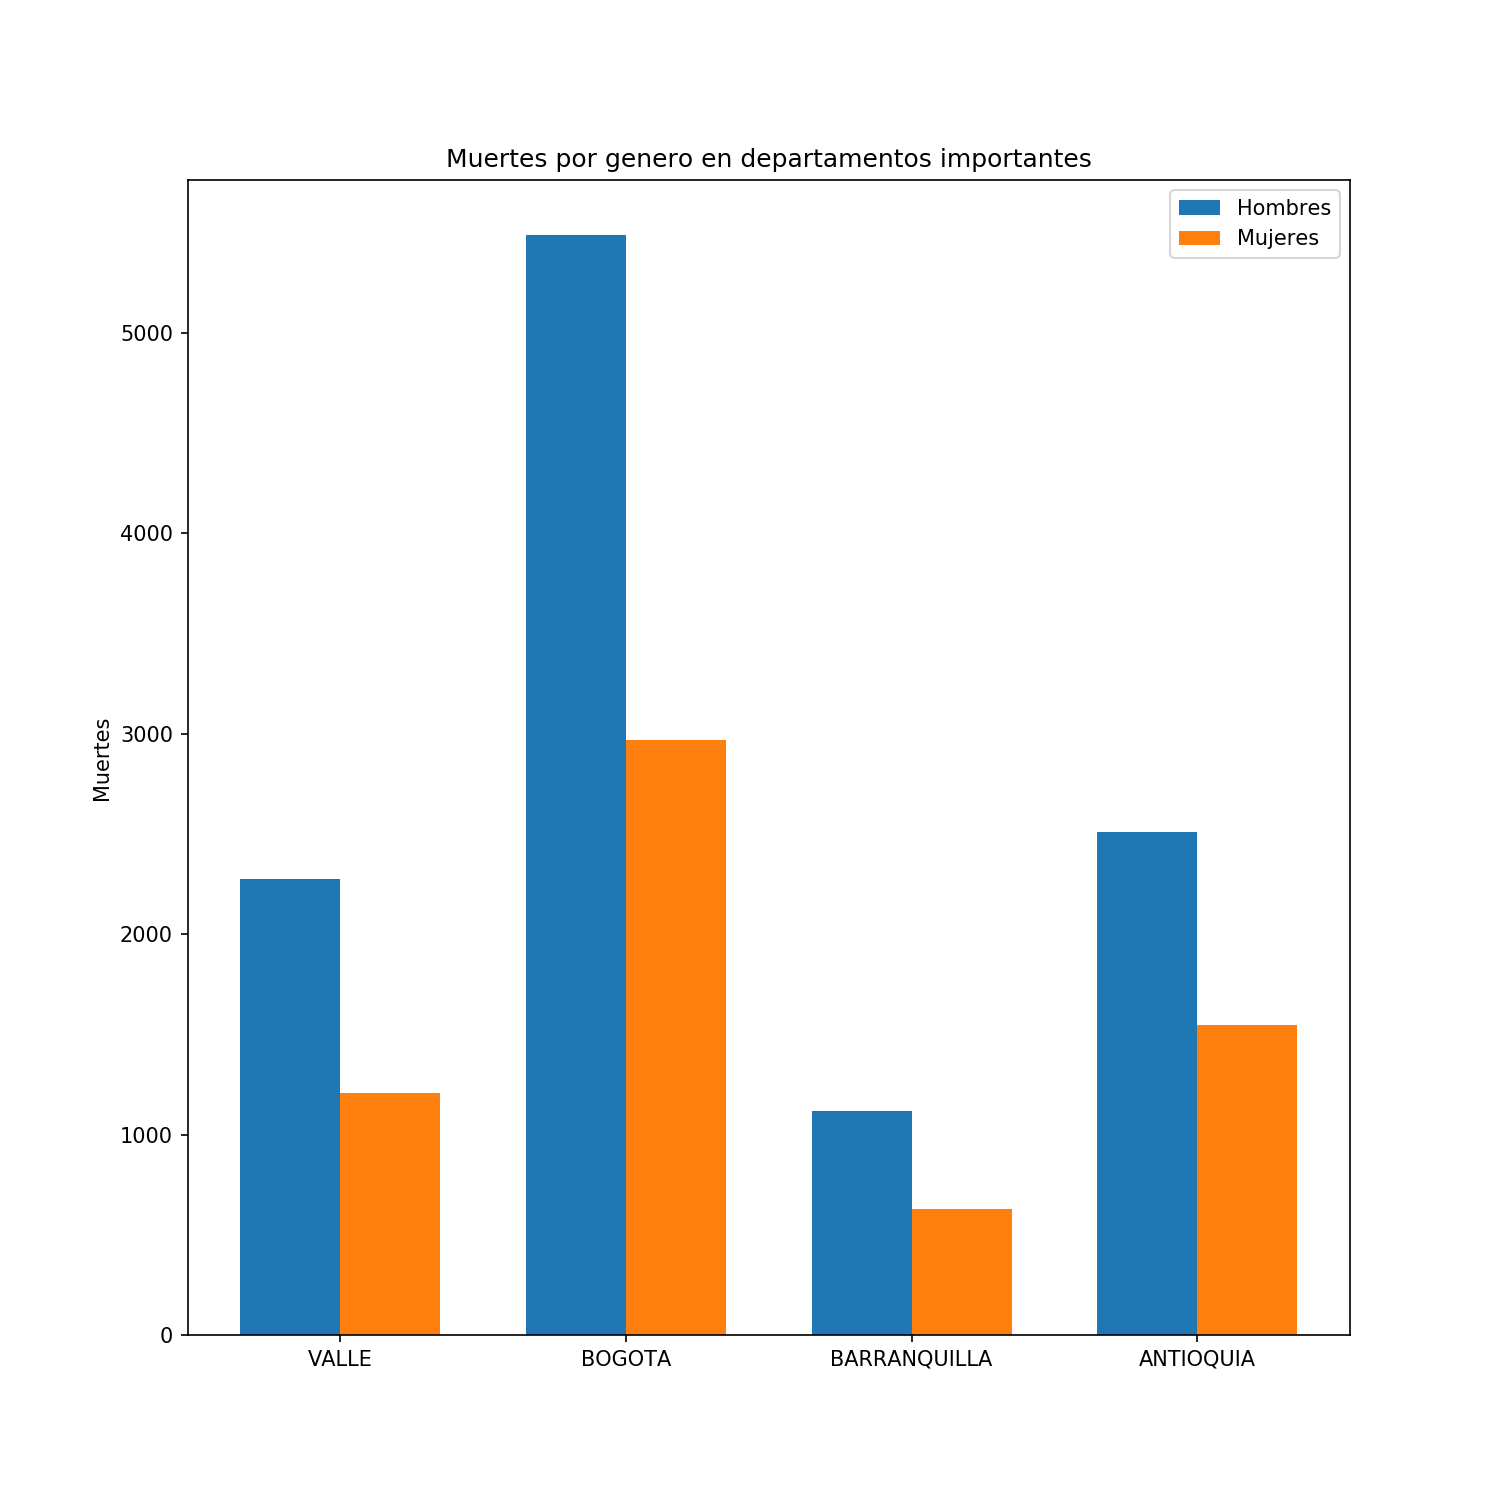

In [322]:
%matplot plt

In [323]:
array_fp=np.array(fallecido_pais.select('Nombre del país','count').collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [328]:
tmp = []
for x in array_fp:
    if x[0] != None:
        tmp.append([x[0],int(x[1])])
        
Pais = sorted(tmp, key=lambda x: x[1] ,reverse=True)


plt.figure(figsize=(20,10))
plt.xlabel('Muertes')
plt.title('Extrangeros que han muerto')
for x in islice(Pais, 0, 10):
    plt.barh(x[0],x[1])
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

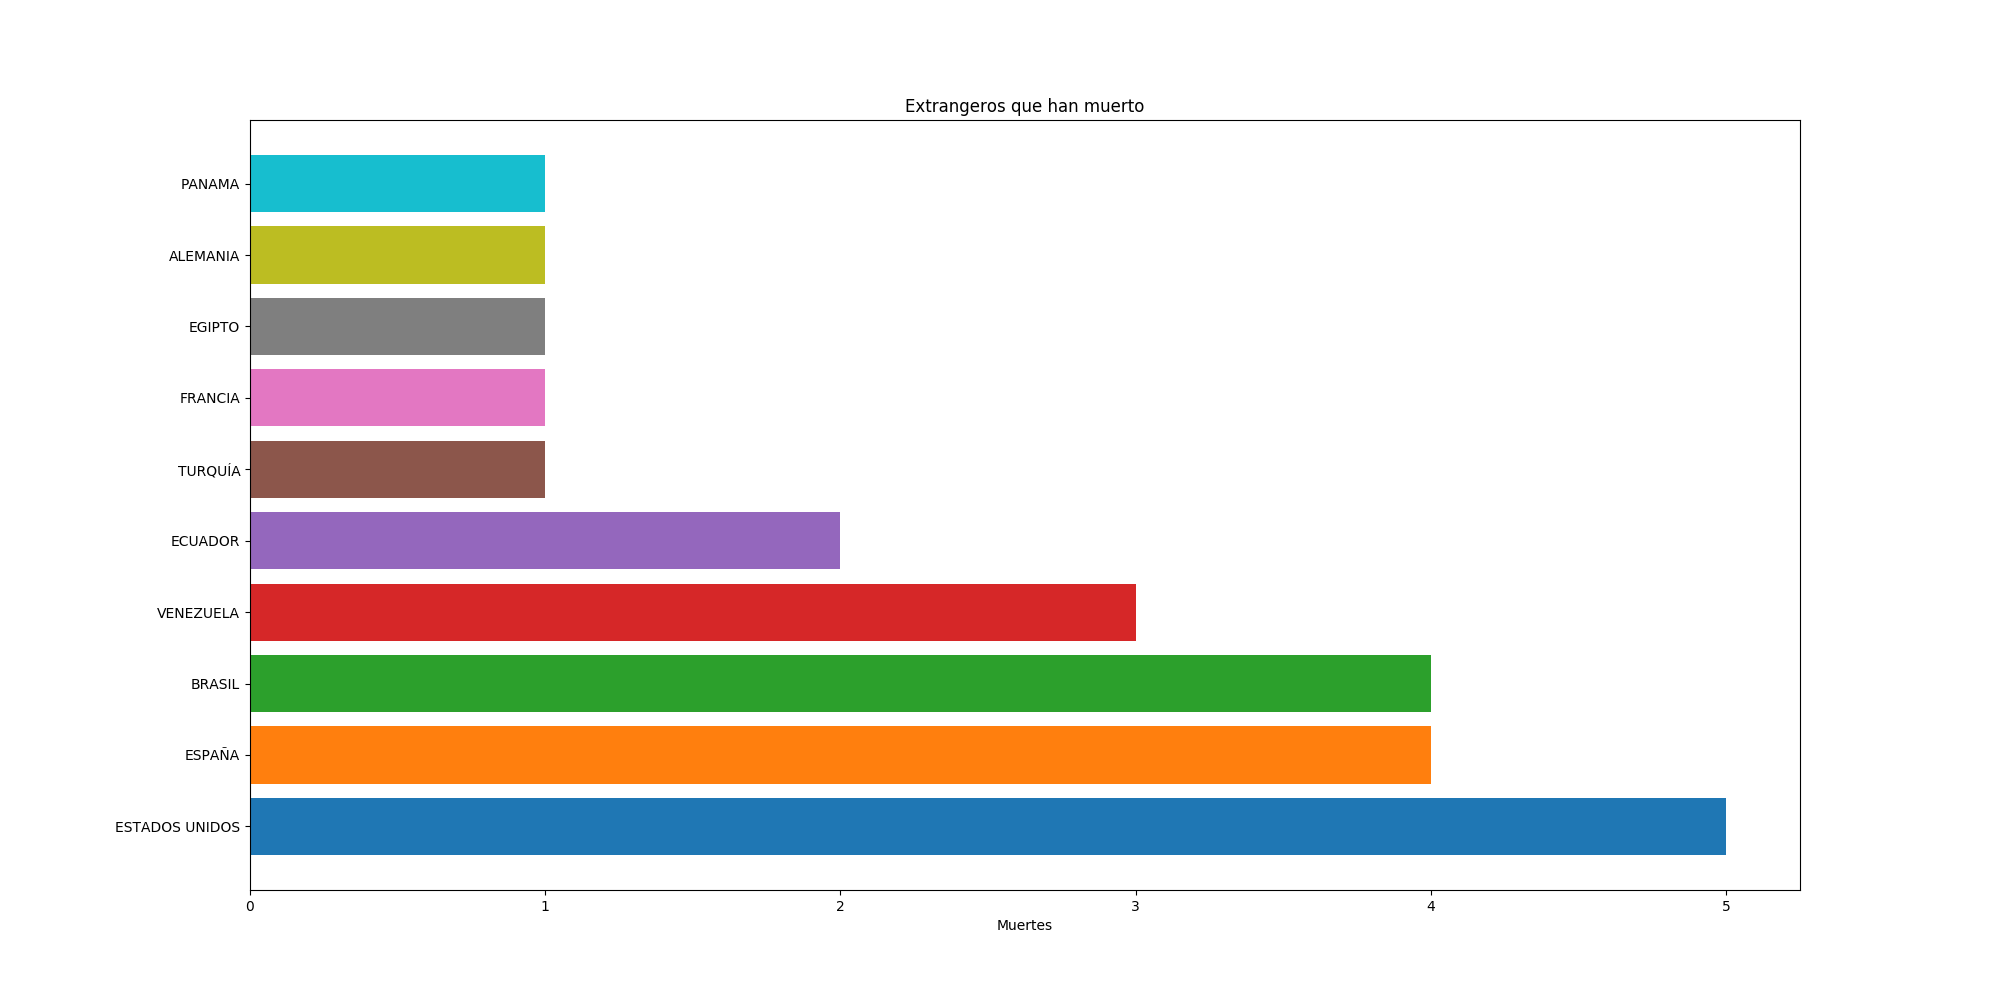

In [329]:
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The config profile (i-0b84c1bf7b92a335d) could not be found
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/boto3/session.py", line 80, in __init__
    self._setup_loader()
  File "/usr/local/lib/python3.6/site-packages/boto3/session.py", line 120, in _setup_loader
    self._loader = self._session.get_component('data_loader')
  File "/usr/local/lib/python3.6/site-packages/botocore/session.py", line 685, in get_component
    return self._components.get_component(name)
  File "/usr/local/lib/python3.6/site-packages/botocore/session.py", line 924, in get_component
    self._components[name] = factory()
  File "/usr/local/lib/python3.6/site-packages/botocore/session.py", line 158, in <lambda>
    lambda:  create_loader(self.get_config_variable('data_path')))
  File "/usr/local/lib/python3.6/site-packages/botocore/session.py", line 241, in get_config_variable
    logical_name)
  File "/usr/local/lib/python3.6/site-packages/botocore/configprovider.py", line 